# 第6章 決定木系回帰予測を行う10本ノック

## ノック51:決定木モデルを構築しよう


In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()

import pandas as pd

df = pd.DataFrame(boston.data,columns=boston.feature_names)
df["MEDV"] = boston.target

display(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
X= df[boston.feature_names]
y = df[["MEDV"]]

display(X.head())
display(y.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

print(len(X_train))
display(X_train.head())
print(len(X_test))
display(X_test.head())

354


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96
298,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93


152


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34


In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=3, random_state=0).fit(X_train,y_train)

[Text(558.0, 380.52, 'X[5] <= 6.797\nmse = 84.765\nsamples = 354\nvalue = 22.745'),
 Text(279.0, 271.8, 'X[12] <= 14.405\nmse = 35.011\nsamples = 284\nvalue = 19.614'),
 Text(139.5, 163.07999999999998, 'X[7] <= 1.474\nmse = 20.776\nsamples = 167\nvalue = 22.981'),
 Text(69.75, 54.360000000000014, 'mse = 0.0\nsamples = 2\nvalue = 50.0'),
 Text(209.25, 54.360000000000014, 'mse = 12.072\nsamples = 165\nvalue = 22.653'),
 Text(418.5, 163.07999999999998, 'X[0] <= 5.782\nmse = 16.049\nsamples = 117\nvalue = 14.808'),
 Text(348.75, 54.360000000000014, 'mse = 10.345\nsamples = 67\nvalue = 16.872'),
 Text(488.25, 54.360000000000014, 'mse = 10.334\nsamples = 50\nvalue = 12.042'),
 Text(837.0, 271.8, 'X[5] <= 7.435\nmse = 85.388\nsamples = 70\nvalue = 35.451'),
 Text(697.5, 163.07999999999998, 'X[0] <= 7.393\nmse = 44.147\nsamples = 47\nvalue = 30.921'),
 Text(627.75, 54.360000000000014, 'mse = 19.597\nsamples = 43\nvalue = 32.465'),
 Text(767.25, 54.360000000000014, 'mse = 6.997\nsamples = 4\nva

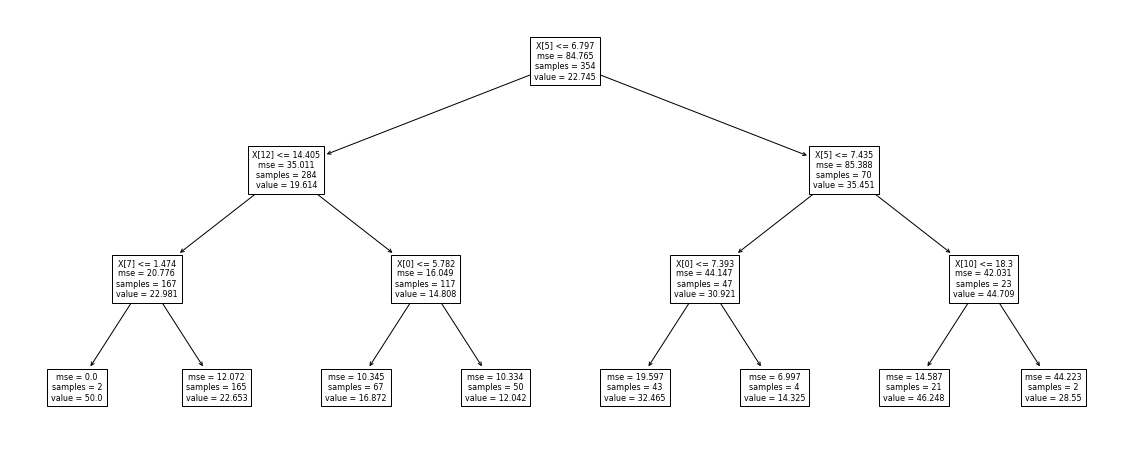

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,8))
tree.plot_tree(tree_reg,fontsize=8)

## ノック52:決定木モデルを評価しよう

In [ ]:
y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)

import numpy as np

y_train_pred = np.expand_dims(y_train_pred, 1)
y_test_pred = np.expand_dims(y_test_pred, 1)

print(len(y_train_pred))
print(y_train_pred[:5])
print(len(y_test_pred))
print(y_test_pred[:5])

354
[[16.87164179]
 [22.65333333]
 [16.87164179]
 [22.65333333]
 [16.87164179]]
152
[[22.65333333]
 [50.        ]
 [22.65333333]
 [12.042     ]
 [22.65333333]]


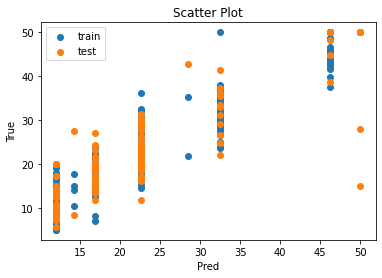

In [ ]:
plt.scatter(y_train_pred, y_train, label="train")
plt.scatter(y_test_pred, y_test, label="test")
plt.xlabel("Pred")
plt.ylabel("True")
plt.title("Scatter Plot")
plt.legend()
plt.show()

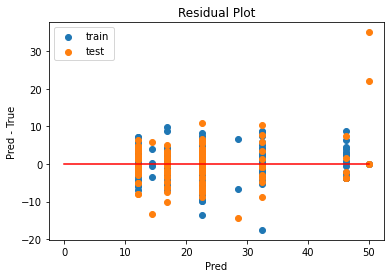

In [ ]:
def residual_plot(y_train_pred, y_train, y_test_pred, y_test):
  plt.scatter(y_train_pred, y_train_pred - y_train, label="train")
  plt.scatter(y_test_pred, y_test_pred - y_test, label="test")
  plt.plot([0, 50], [0,0] ,color="red")
  plt.xlabel("Pred")
  plt.ylabel("Pred - True")
  plt.title("Residual Plot")
  plt.legend()
  plt.show()

residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def get_eval_score(y_true,y_pred):

      mae = mean_absolute_error(y_true,y_pred)
      mse = mean_squared_error(y_true,y_pred)
      rmse = np.sqrt(mse)
      r2score = r2_score(y_true,y_pred)

      print(f"  MAE = {mae}")
      print(f"  MSE = {mse}")
      print(f"  RMSE = {rmse}")
      print(f"  R2 = {r2score}")

print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

訓練データスコア
  MAE = 2.7210334899446496
  MSE = 12.619014523843608
  RMSE = 3.552325227768934
  R2 = 0.8511285677547421
テストデータスコア
  MAE = 3.452910829225093
  MSE = 28.069857549754044
  RMSE = 5.298099428073622
  R2 = 0.6628873063238391


## ノック53:決定木の深さを変えてみよう

In [ ]:
tree_reg_depth_5 = DecisionTreeRegressor(max_depth=5, random_state=0).fit(X_train,y_train)

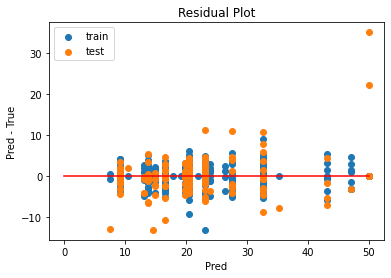

In [ ]:
y_train_pred = tree_reg_depth_5.predict(X_train)
y_test_pred = tree_reg_depth_5.predict(X_test)

y_train_pred = np.expand_dims(y_train_pred, 1)
y_test_pred = np.expand_dims(y_test_pred, 1)

residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [ ]:
print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

訓練データスコア
  MAE = 1.8784580945273341
  MSE = 6.077440143979722
  RMSE = 2.4652464671873524
  R2 = 0.9283020701093933
テストデータスコア
  MAE = 3.0192356439784844
  MSE = 24.917914785653885
  RMSE = 4.991784729498447
  R2 = 0.700741432004224


In [ ]:
tree_reg_depth_20 = DecisionTreeRegressor(max_depth=20, random_state=0).fit(X_train,y_train)

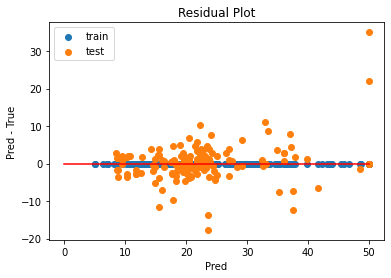

In [ ]:
  y_train_pred = tree_reg_depth_20.predict(X_train)
  y_test_pred = tree_reg_depth_20.predict(X_test)

  y_train_pred = np.expand_dims(y_train_pred, 1)
  y_test_pred = np.expand_dims(y_test_pred, 1)

  residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [ ]:
print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

訓練データスコア
  MAE = 0.0
  MSE = 0.0
  RMSE = 0.0
  R2 = 1.0
テストデータスコア
  MAE = 3.0914473684210524
  MSE = 26.663881578947368
  RMSE = 5.163708122942985
  R2 = 0.6797727624015009


## ノック54:最小サンプル数を変えてみよう

In [ ]:
tree_reg_samples_5 = DecisionTreeRegressor(max_depth=20, min_samples_leaf=5,random_state=0).fit(X_train,y_train)

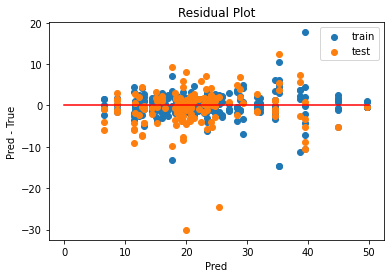

In [ ]:
y_train_pred = tree_reg_samples_5.predict(X_train)
y_test_pred = tree_reg_samples_5.predict(X_test)

y_train_pred = np.expand_dims(y_train_pred, 1)
y_test_pred = np.expand_dims(y_test_pred, 1)

residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [ ]:
print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

訓練データスコア
  MAE = 1.5989429199174965
  MSE = 7.050472435207605
  RMSE = 2.655272572676411
  R2 = 0.9168228289576953
テストデータスコア
  MAE = 3.104546261487051
  MSE = 23.502406639428433
  RMSE = 4.847928076965296
  R2 = 0.7177413673707927


## ノック55:ランダムフォレストモデルの構築・評価をしよう

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=0).fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


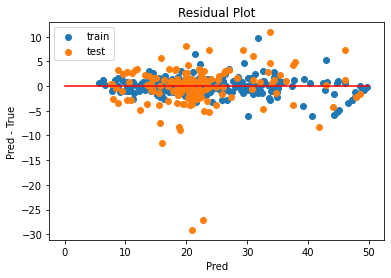

In [ ]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

y_train_pred = np.expand_dims(y_train_pred, 1)
y_test_pred = np.expand_dims(y_test_pred, 1)

residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [ ]:
print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

訓練データスコア
  MAE = 0.9777401129943499
  MSE = 2.266378531073447
  RMSE = 1.5054496109380238
  R2 = 0.9732626492113712
テストデータスコア
  MAE = 2.6709868421052634
  MSE = 20.510911184210528
  RMSE = 4.528897347501986
  R2 = 0.7536685568565598


## ノック56:ランダムフォレストの決定木の数を変えてみよう

In [ ]:
rf_change_param = RandomForestRegressor(n_estimators=3, max_depth=20, random_state=0).fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


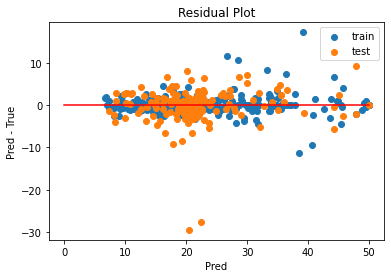

In [ ]:
y_train_pred = rf_change_param.predict(X_train)
y_test_pred = rf_change_param.predict(X_test)

y_train_pred = np.expand_dims(y_train_pred, 1)
y_test_pred = np.expand_dims(y_test_pred, 1)

residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [ ]:
print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

訓練データスコア
  MAE = 1.071468926553672
  MSE = 4.280938480853735
  RMSE = 2.069042890046926
  R2 = 0.9494961003654969
テストデータスコア
  MAE = 2.6666666666666665
  MSE = 19.84659356725146
  RMSE = 4.454951578552954
  R2 = 0.7616468624433497


## ノック57:交差検証法でモデルを評価しよう

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

rf_cv = RandomForestRegressor(n_estimators=3, max_depth=5, random_state=0)
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
rf_scores = cross_val_score(estimator=rf_cv, X=X, y=y, cv=k_fold, scoring="r2")

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

In [ ]:
print(f"各分割のスコア：{rf_scores}")
print(f"平均スコア：{np.mean(rf_scores)}")

各分割のスコア：[0.74574193 0.85140316 0.73379121 0.66373528 0.86016952]
平均スコア：0.7709682208769734


## ノック58:勾配ブースティング決定木モデルを構築・評価しよう

In [ ]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(random_state=0)
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
xgb_scores = cross_val_score(xgb_reg, X, y, cv=k_fold, scoring="r2")

[02:37:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:37:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:37:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:37:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:37:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print(f"各分割のスコア：{xgb_scores}")
print(f"平均スコア：{np.mean(xgb_scores)}")

各分割のスコア：[0.73631026 0.92311771 0.80855031 0.78204883 0.9189828 ]
平均スコア：0.8338019804695092


## ノック59:グリッドサーチでハイパーパラメータをチューニングしよう

In [ ]:
xgb_reg_grid = xgb.XGBRegressor()

from sklearn.model_selection import GridSearchCV

params = {"booster": ["gbtree"],
            "n_estimators":[10,30,50,100],
            "max_depth":[2, 3, 4, 5, 6],
            "learning_rate":[0.1,0.25,0.5,0.75,1.0],
            "colsample_bytree":[0.1,0.25, 0,5, 0.75, 1.0],
            "random_state":[0]
            }

k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
grid = GridSearchCV(estimator=xgb_reg_grid,param_grid=params,cv=k_fold,scoring="r2")

In [ ]:
grid.fit(X_train,y_train)

[02:37:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:37:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:37:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:37:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:37:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:37:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:37:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:37:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: value 5 for Parameter colsample_bytree exceed bound [0,1]

  FitFailedWarning)


[02:37:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:37:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:37:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:37:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:37:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:37:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:37:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:37:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective=...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'booster': ['gbtree'],
                         'colsample_bytree': [0.1, 0.25, 0, 5, 0.75, 1.0],
                         'learning_rate

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'booster': 'gbtree', 'colsample_bytree': 0.75, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 0}
0.893608656794969


In [ ]:
y_test_pred = grid.predict(X_test)
y_test_pred = np.expand_dims(y_test_pred, 1)

print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

テストデータスコア
  MAE = 2.477970829135493
  MSE = 16.417754438506485
  RMSE = 4.051882826354494
  R2 = 0.8028264513609131


## ノック60:ランダムサーチでパラメータを調整しよう

In [ ]:
xgb_reg_random = xgb.XGBRegressor()

from sklearn.model_selection import RandomizedSearchCV

params = {"booster": ["gbtree"],
            "n_estimators":[10,30,50,100],
            "max_depth":[2, 3, 4, 5, 6],
            "learning_rate":[0.1,0.25,0.5,0.75,1.0],
            "colsample_bytree":[0.1,0.25, 0,5, 0.75, 1.0],
            "random_state":[0]
            }


k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
random = RandomizedSearchCV(estimator=xgb_reg_random,param_distributions=params,scoring="r2",cv=k_fold,n_iter=30,random_state=0)

In [ ]:
random.fit(X_train,y_train)

[02:38:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: value 5 for Parameter colsample_bytree exceed bound [0,1]

  FitFailedWarning)


[02:38:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: value 5 for Parameter colsample_bytree exceed bound [0,1]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
xgboost.core.XGBoostError: value 5 for Parameter colsample_bytree exceed bound [0,1]

  FitFailedWarning)


[02:38:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          obje...
                                          seed=None, silent=None, subsample=1,
                                          verbosity=1),
                   iid='deprecated', n_iter=30, n_jobs=None,
               

In [ ]:
print(random.best_params_)
print(random.best_score_)

{'random_state': 0, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.25, 'colsample_bytree': 1.0, 'booster': 'gbtree'}
0.8857626230172155


In [ ]:
y_test_pred = random.predict(X_test)
y_test_pred = np.expand_dims(y_test_pred, 1)

print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

テストデータスコア
  MAE = 2.457469141483307
  MSE = 14.598720513718526
  RMSE = 3.8208272028081205
  R2 = 0.824672640825418
